Generate a movie for a single trajectory.

In [23]:
import hydra

import numpy as np
import pandas as pd
import plotnine as pn

from hydra.core.global_hydra import GlobalHydra

# Lets us import ibsg modules
import sys
sys.path.append("/Users/nathanielimel/uci/projects/ibsg/src")


from game.game import Game

In [24]:
all_data_fp = "../../analysis_data/all_data.csv"

df = pd.read_csv(all_data_fp)
df

/var/folders/3z/q1pyp9n929z2nh_1_69s7y_40000gn/T/ipykernel_68499/2574174746.py:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.


,run_num,iteration,complexity,accuracy,distortion,mse,eu_gamma,kl_eb,min_epsilon,min_epsilon_index,...,eu_gamma=0.002848035868435805,eu_gamma=0.0035111917342151343,eu_gamma=0.015199110829529332,eu_gamma=0.05336699231206312,eu_gamma=0.09999999999999999,eu_gamma=0.1232846739442066,eu_gamma=0.4328761281083061,eu_gamma=0.8111308307896872,eu_gamma=3.511191734215127,eu_gamma=4.328761281083061
0,0.0,99999.0,0.000000,0.000000,3.199884,1654.783033,1.0,0.000840,1.367795e-13,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,0.282529,0.072245,3.237511,1661.872576,1.0,0.358475,2.099873e-01,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,2.0,0.050131,0.040402,3.225318,1661.436999,1.0,0.090144,9.697082e-03,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,3.0,0.034611,0.030669,3.220069,1661.118661,1.0,0.065352,3.921035e-03,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,4.0,0.027764,0.025513,3.216998,1660.856749,1.0,0.053773,2.234857e-03,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815137,NaN,NaN,6.643856,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.991712,0.989812,0.958029,0.872343,0.793556,0.761479,0.531878,0.4175,0.245958,0.239426
815138,NaN,NaN,6.643856,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.991712,0.989812,0.958029,0.872343,0.793556,0.761479,0.531878,0.4175,0.245958,0.239426
815139,NaN,NaN,6.643856,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.991712,0.989812,0.958029,0.872343,0.793556,0.761479,0.531878,0.4175,0.245958,0.239426
815140,NaN,NaN,6.643856,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.991712,0.989812,0.958029,0.872343,0.793556,0.761479,0.531878,0.4175,0.245958,0.239426


In [25]:
overrides = [
    "game.universe=100",
    "game.num_signals=100",
    "game.meaning_dist_pi=0.5",
    "simulation/dynamics=scrambled_utility_ici",
    "simulation.dynamics.imprecise_imitation_alpha=0.5",
    "simulation.dynamics.max_its=1e5",
] # n.b.: do not include multirun overrides, we will filter from columns in the dataframe.

# Global initialization
GlobalHydra.instance().clear() # from previous runs of notebook
hydra.initialize(version_base=None, config_path="../../conf")
config = hydra.compose(
    config_name="config",
    overrides=overrides,
)


In [26]:
game = Game.from_hydra(config, cwd="/Users/nathanielimel/uci/projects/ibsg/data")


In [27]:
def get_df_subsetted_by_meaning_dists(df: pd.DataFrame, config) -> pd.DataFrame:
    """Return a subset of the data consistent with the specifications in the curve_metadata config."""
    curve_metadata = config.game

    # See src/get_all_data.py
    universe = df["universe"].astype(str) == str(curve_metadata.universe)
    prior = df["prior"].astype(str) == str(curve_metadata.prior)
    num_signals = df["num_signals"] == curve_metadata.num_signals # this is prob not necessary
    distance = df["distance"] == curve_metadata.distance

    meaning_dist_pi = df["meaning_dist_pi"] == curve_metadata.meaning_dist_pi

    imprecise_imitation_alpha = df["imprecise_imitation_alpha"].isin([curve_metadata.meaning_dist_pi, np.nan]) # allows curve, and constraints to be the same as curve.

    max_its = df["max_its"].isin([config.simulation.dynamics.max_its, np.nan]) # allows curve

    # temporary filtering
    not_binary = df["discriminative_need_gamma"] != 1e100

    df_subsetted = df[universe & prior & num_signals & num_signals & distance & meaning_dist_pi & imprecise_imitation_alpha & max_its & not_binary]

    return df_subsetted

In [28]:
# visualize the curve!
df = get_df_subsetted_by_meaning_dists(df, config)
df

,run_num,iteration,complexity,accuracy,distortion,mse,eu_gamma,kl_eb,min_epsilon,min_epsilon_index,...,eu_gamma=0.002848035868435805,eu_gamma=0.0035111917342151343,eu_gamma=0.015199110829529332,eu_gamma=0.05336699231206312,eu_gamma=0.09999999999999999,eu_gamma=0.1232846739442066,eu_gamma=0.4328761281083061,eu_gamma=0.8111308307896872,eu_gamma=3.511191734215127,eu_gamma=4.328761281083061
0,0.0,99999.0,0.000000,0.000000,3.199884,1654.783033,1.0,0.000840,1.367795e-13,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,0.282529,0.072245,3.237511,1661.872576,1.0,0.358475,2.099873e-01,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,2.0,0.050131,0.040402,3.225318,1661.436999,1.0,0.090144,9.697082e-03,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,3.0,0.034611,0.030669,3.220069,1661.118661,1.0,0.065352,3.921035e-03,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,4.0,0.027764,0.025513,3.216998,1660.856749,1.0,0.053773,2.234857e-03,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815137,NaN,NaN,6.643856,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.991712,0.989812,0.958029,0.872343,0.793556,0.761479,0.531878,0.4175,0.245958,0.239426
815138,NaN,NaN,6.643856,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.991712,0.989812,0.958029,0.872343,0.793556,0.761479,0.531878,0.4175,0.245958,0.239426
815139,NaN,NaN,6.643856,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.991712,0.989812,0.958029,0.872343,0.793556,0.761479,0.531878,0.4175,0.245958,0.239426
815140,NaN,NaN,6.643856,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.991712,0.989812,0.958029,0.872343,0.793556,0.761479,0.531878,0.4175,0.245958,0.239426


In [29]:
df.meaning_dist_pi.unique()

array([0.5])

In [30]:
# FURTHER restrict SIMULATION points to the settings we specified in config

df_emergent = df[(df["point_type"].isin(["simulation", "trajectory"]))]
#  & (df["discriminative_need_gamma"] == config.game.discriminative_need_gamma) & (df["population_init_gamma"] == config.simulation.dynamics.population_init_gamma)

#  & (df["seed"] == config.seed)

df_emergent

,run_num,iteration,complexity,accuracy,distortion,mse,eu_gamma,kl_eb,min_epsilon,min_epsilon_index,...,eu_gamma=0.002848035868435805,eu_gamma=0.0035111917342151343,eu_gamma=0.015199110829529332,eu_gamma=0.05336699231206312,eu_gamma=0.09999999999999999,eu_gamma=0.1232846739442066,eu_gamma=0.4328761281083061,eu_gamma=0.8111308307896872,eu_gamma=3.511191734215127,eu_gamma=4.328761281083061
0,0.0,99999.0,0.000000,0.000000,3.199884,1654.783033,1.000000,0.000840,1.367795e-13,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,0.282529,0.072245,3.237511,1661.872576,1.000000,0.358475,2.099873e-01,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,2.0,0.050131,0.040402,3.225318,1661.436999,1.000000,0.090144,9.697082e-03,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,3.0,0.034611,0.030669,3.220069,1661.118661,1.000000,0.065352,3.921035e-03,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,4.0,0.027764,0.025513,3.216998,1660.856749,1.000000,0.053773,2.234857e-03,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810156,0.0,75646.0,4.528560,4.014542,29.681116,1507.059681,0.003774,NaN,6.783779e-02,510.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
810157,0.0,81113.0,4.528560,4.014542,29.681117,1507.059681,0.003774,NaN,6.783779e-02,510.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
810158,0.0,86974.0,4.528560,4.014542,29.681117,1507.059681,0.003774,NaN,6.783779e-02,510.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
810159,0.0,93260.0,4.528560,4.014542,29.681117,1507.059681,0.003774,NaN,6.783779e-02,510.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df_sim_points = df_emergent[df_emergent["point_type"] == "simulation"]
df_curve_points = df[df["point_type"] == "ib_bound"]
df_traj = df_emergent[df_emergent["point_type"] == "trajectory"]

In [32]:
# convert seed to categorical
df_sim_points.seed = df_sim_points.seed.astype(str)

In [33]:
# df_sim_points.discriminative_need_gamma = df_sim_points.discriminative_need_gamma.astype(str)

In [34]:
# How many iterations are actually saved?
# df_traj[df_traj.eu_gamma == df_traj.eu_gamma.min()]
df_traj[(df_traj.discriminative_need_gamma == df_traj.discriminative_need_gamma.median()) & (df_traj.seed == df_traj.seed.max())]

,run_num,iteration,complexity,accuracy,distortion,mse,eu_gamma,kl_eb,min_epsilon,min_epsilon_index,...,eu_gamma=0.002848035868435805,eu_gamma=0.0035111917342151343,eu_gamma=0.015199110829529332,eu_gamma=0.05336699231206312,eu_gamma=0.09999999999999999,eu_gamma=0.1232846739442066,eu_gamma=0.4328761281083061,eu_gamma=0.8111308307896872,eu_gamma=3.511191734215127,eu_gamma=4.328761281083061
242789,0.0,1.0,0.280089,0.071142,3.236585,1661.585846,0.702207,0.356071,0.208653,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242790,0.0,2.0,0.049761,0.040318,3.225305,1564.712885,0.713887,0.097571,0.009413,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242791,0.0,3.0,0.036522,0.032775,3.221685,1478.049328,0.724423,0.102144,0.003725,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242792,0.0,4.0,0.033216,0.031080,3.221145,1400.306179,0.733988,0.135287,0.002117,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242793,0.0,5.0,0.034507,0.033076,3.222986,1330.301302,0.742747,0.182605,0.001412,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648561,0.0,75646.0,0.590049,0.577713,4.883838,998.910215,0.780315,1.976356,0.011519,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648562,0.0,81113.0,0.590049,0.577713,4.883838,998.910215,0.780315,1.976356,0.011519,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648563,0.0,86974.0,0.590049,0.577713,4.883838,998.910215,0.780315,1.976356,0.011519,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648564,0.0,93260.0,0.590049,0.577713,4.883838,998.910215,0.780315,1.976356,0.011519,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
steps_recorded = df_traj.iteration.unique().astype(int)
len(steps_recorded) # 1-100 and then exponentially spaced afterwards

199

In [ ]:
df_sim_points.to_csv("scrambled_utility_points.csv", index=False)

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 82 rows containing missing values.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 147 rows containing missing values.


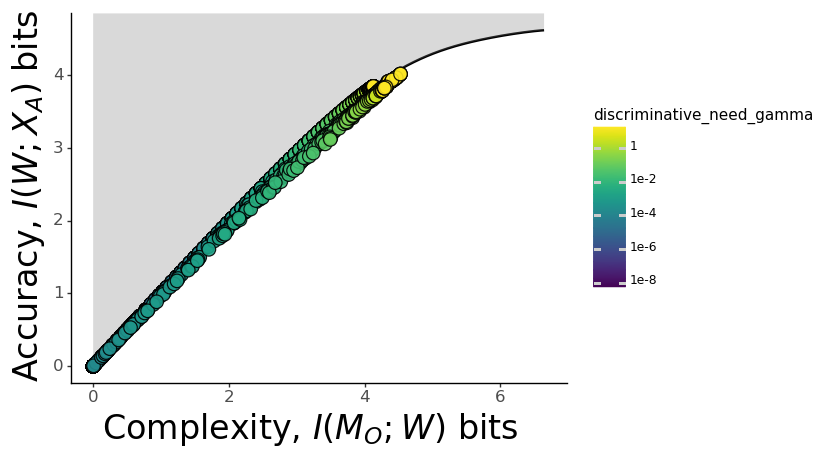

In [36]:
plot = (
    # Set data and the axes
    pn.ggplot(
        data=df_curve_points, mapping=pn.aes(x="complexity", y="accuracy")
    )  
    + pn.geom_line(size=1) # IB curve
    # + pn.geom_point(size=1)
    + pn.geom_ribbon(
    mapping=pn.aes(
        x="complexity",
        ymin="accuracy",
        ymax=np.inf,
        ),
        fill="gray",
        alpha=0.3,
    )
    + pn.geom_point( # emergent langs
        data=df_sim_points,
        mapping=pn.aes(
            # shape="seed",
            fill="discriminative_need_gamma",
            # fill="imprecise_imitation_gamma",
            # fill="population_init_gamma",
            ),
        # fill = "#440154",
        alpha=0.9,
        size=5,
    )        
    + pn.scale_fill_continuous(trans = "log10")
    + pn.xlim([0,np.log2(100)])
    + pn.xlab("Complexity, $I(M_O;W)$ bits")
    + pn.ylab("Accuracy, $I(W;X_A)$ bits")
    # + pn.ylab("Informativeness, $I(W;U)$ bits")
    + pn.theme_classic()
    + pn.theme(
        # Axis font
        axis_title=pn.element_text(size=24),
        axis_text=pn.element_text(size=12),
        # Legend position
        # legend_position=(0.75, 0.4),
        # legend_position='none',
    )    
)
print(plot)

In [37]:
def bound_plot_time_step(df_t: pd.DataFrame, t: str) -> pn.ggplot:
    return (
        # Set data and the axes
        pn.ggplot(
            data=df_curve_points, mapping=pn.aes(x="complexity", y="accuracy")
        )  
        + pn.geom_line(size=1) # IB curve
        # + pn.geom_point(size=1)
        + pn.geom_ribbon(
        mapping=pn.aes(
            x="complexity",
            ymin="accuracy",
            ymax=np.inf,
            ),
            fill="gray",
            alpha=0.3,
        )
        + pn.geom_point( # emergent langs
            data=df_t,
        mapping=pn.aes(
            fill="discriminative_need_gamma",
            ),
            # fill = "#440154",
            alpha=0.9,
            size=5,
        )        
        + pn.scale_fill_continuous(trans = "log10")
        + pn.xlim([0,np.log2(100)])
        + pn.xlab("Complexity, $I(M_O;W)$ bits")
        + pn.ylab("Accuracy, $I(W;X_A)$ bits")
        # + pn.ylab("Informativeness, $I(W;U)$ bits")
        + pn.ggtitle(f"t={t+1}")

        + pn.theme_classic()
        + pn.theme(
            # Axis font
            axis_title=pn.element_text(size=24),
            axis_text=pn.element_text(size=12),
            # Legend position
            # legend_position=(0.75, 0.4),
            legend_position='none',
        )    

    )
    

In [38]:
# # Practice for below
# for time_step in steps_recorded:
#     plot = bound_plot_time_step(df_traj[df_traj["iteration"] == time_step], time_step)
#     print(plot)

In [39]:
from tqdm import tqdm

for i, time_step in enumerate(tqdm(steps_recorded)):
    plot = bound_plot_time_step(df_traj[df_traj["iteration"] == time_step], time_step)
    plot.save(f"bound_movie/plots/baseline_record_{i}.png", width=8, height=8, dpi=300,)

  0%|          | 0/199 [00:00<?, ?it/s]/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 8 x 8 in image.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: bound_movie/plots/baseline_record_0.png
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 82 rows containing missing values.
  1%|          | 1/199 [00:00<02:31,  1.31it/s]/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 8 x 8 in image.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: bound_movie/plots/baseline_record

In [41]:
# Run ffmpeg command
import os
os.system("ffmpeg -f image2 -framerate 10 -i  ./bound_movie/plots/baseline_record_%d.png -vcodec mpeg4 -y ./bound_movie/movie/baseline_trajectory_on_bound.mp4")

ffmpeg version 7.0.2 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 15.0.0 (clang-1500.3.9.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.0.2 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --

0